Displaying the magnitude and the gradient on the same
image

In [2]:
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
# from scipy.stats import signaltonoise
# from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft
import timeit
import numpy as np
from scipy import signal, misc, ndimage
from skimage import filters, feature, img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from PIL import Image, ImageFilter
import matplotlib.pylab as pylab

/tmp/ipykernel_32140/3728940844.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pylab.legend(prop={'size': 20})


<Figure size 640x480 with 0 Axes>

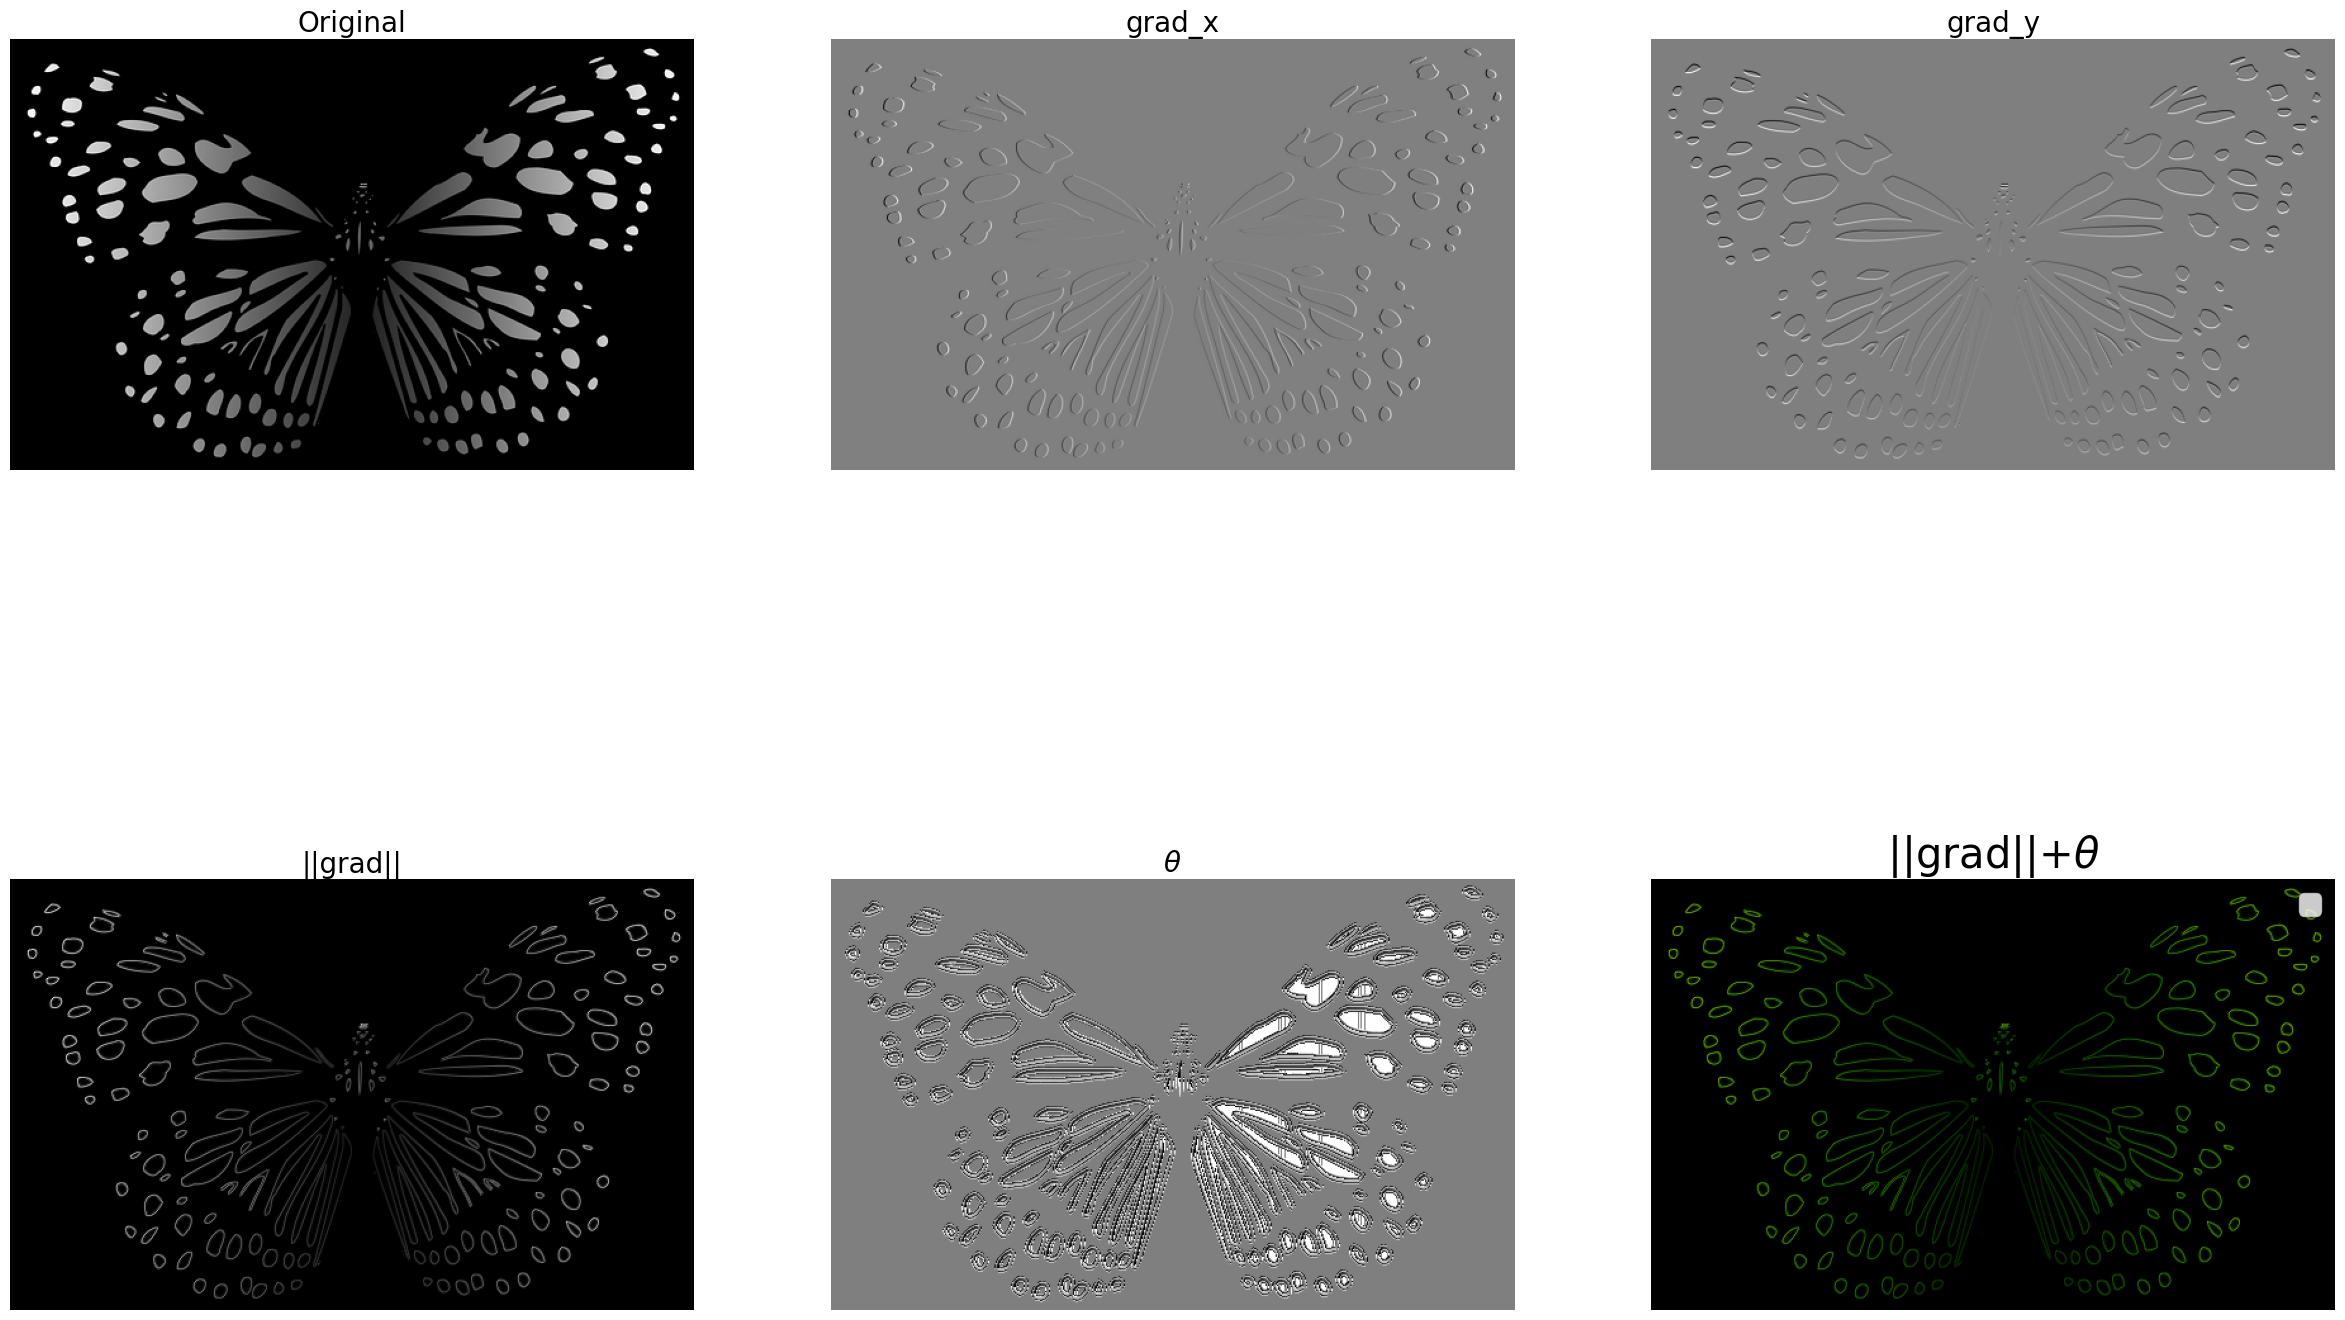

In [15]:
from skimage.color import rgb2gray
from skimage.io import imread
from scipy import signal
import numpy as np
import pylab

def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')

# Đọc ảnh
im = imread('./images/butterfly.png')

# Kiểm tra số kênh
if im.shape[-1] == 4:  # Ảnh có kênh Alpha
    im = im[..., :3]  # Lấy 3 kênh đầu (RGB)

# Chuyển sang grayscale
im = rgb2gray(im)

# Tạo kernel tính gradient
ker_x = [[-1, 1]]
ker_y = [[-1], [1]]

# Tính gradient theo từng hướng
im_x = signal.convolve2d(im, ker_x, mode='same')
im_y = signal.convolve2d(im, ker_y, mode='same')

# Tính độ lớn và hướng gradient
im_mag = np.sqrt(im_x**2 + im_y**2)
im_dir = np.arctan2(im_y, im_x)

# Vẽ kết quả
pylab.gray()
pylab.figure(figsize=(30, 20))
pylab.subplot(231), plot_image(im, 'Original')
pylab.subplot(232), plot_image(im_x, 'grad_x')
pylab.subplot(233), plot_image(im_y, 'grad_y')
pylab.subplot(234), plot_image(im_mag, '||grad||')
pylab.subplot(235), plot_image(im_dir, r'$\theta$')
pylab.subplot(236)
# pylab.plot(range(im.shape[1]), im[0, :], 'b-', label=r'$f(x,y)|_{x=0}$', linewidth=5)
# pylab.plot(range(im.shape[1]), im_x[0, :], 'r-', label=r'$grad_x (f(x,y))|_{x=0}$')
# pylab.title(r'$grad_x (f(x,y))|_{x=0}$', size=30)
im = np.zeros((im.shape[0],im.shape[1],3))
im[...,0] = im_mag*np.sin(im_mag)
im[...,1] = im_mag*np.cos(im_mag)
pylab.title(r'||grad||+$\theta$', size=30), pylab.imshow(im),
pylab.axis('off')
pylab.legend(prop={'size': 20})
pylab.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0000000000000002..1.0000000000000002].


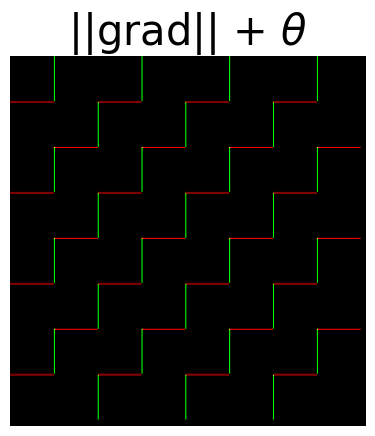

In [9]:
# Tạo ảnh RGB để trực quan hóa ||grad|| và hướng θ
im_rgb = np.zeros((im_mag.shape[0], im_mag.shape[1], 3))

# Chuyển đổi ||grad|| và θ sang các kênh RGB
im_rgb[..., 0] = im_mag * np.sin(im_dir)  # Kênh đỏ
im_rgb[..., 1] = im_mag * np.cos(im_dir)  # Kênh xanh lá

# Hiển thị ảnh
pylab.title(r'||grad|| + $\theta$', size=30)
pylab.imshow(im_rgb)
pylab.axis('off')
pylab.show()


Laplacian

<Figure size 640x480 with 0 Axes>

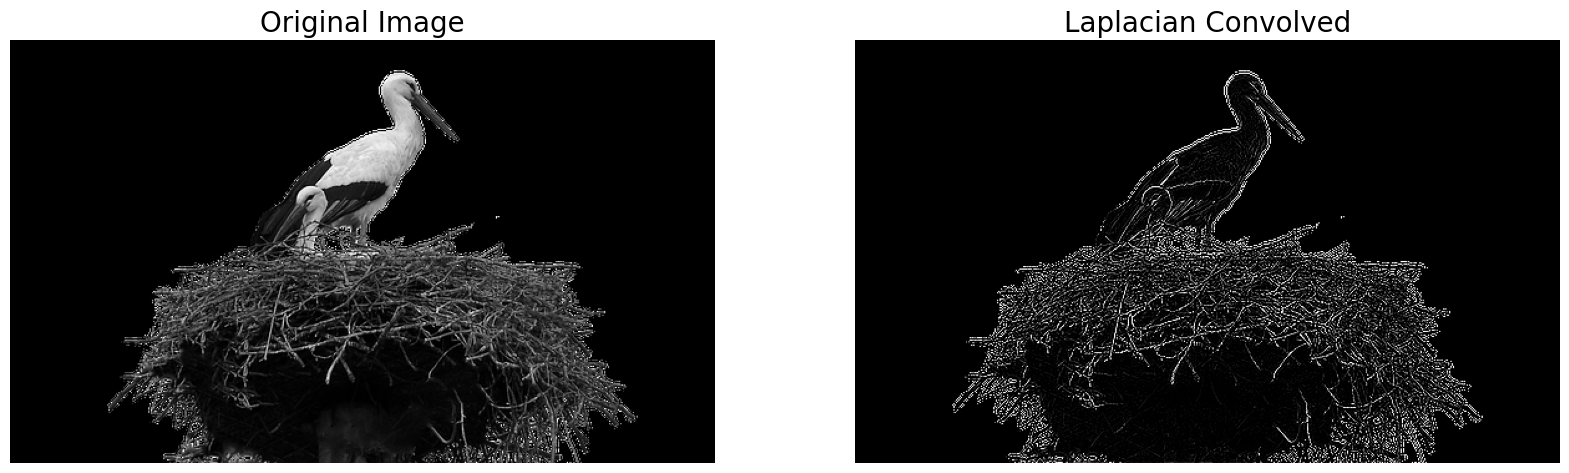

In [19]:
from skimage.color import rgb2gray
from skimage.io import imread
from scipy import signal
import numpy as np
import pylab

# Hàm hiển thị ảnh
def plot_image(image, title):
    pylab.imshow(image), pylab.title(title, size=20), pylab.axis('off')

# Đọc ảnh
im = imread('./images/birds.png')

# Kiểm tra số kênh
if im.shape[-1] == 4:  # Nếu ảnh có kênh Alpha
    im = im[..., :3]  # Lấy 3 kênh đầu (RGB)

# Chuyển ảnh RGB sang Grayscale
im = rgb2gray(im)

# Kernel Laplacian (4-neighbor isotropic)
ker_laplacian = [[0, -1, 0], 
                 [-1, 4, -1], 
                 [0, -1, 0]]

# Tính Laplacian bằng tích chập và clip giá trị trong khoảng [0,1]
im_laplacian = np.clip(signal.convolve2d(im, ker_laplacian, mode='same'), 0, 1)

# Hiển thị kết quả
pylab.gray()
pylab.figure(figsize=(20, 10))
pylab.subplot(121), plot_image(im, 'Original Image')
pylab.subplot(122), plot_image(im_laplacian, 'Laplacian Convolved')
pylab.show()


Sharpening with Laplacian

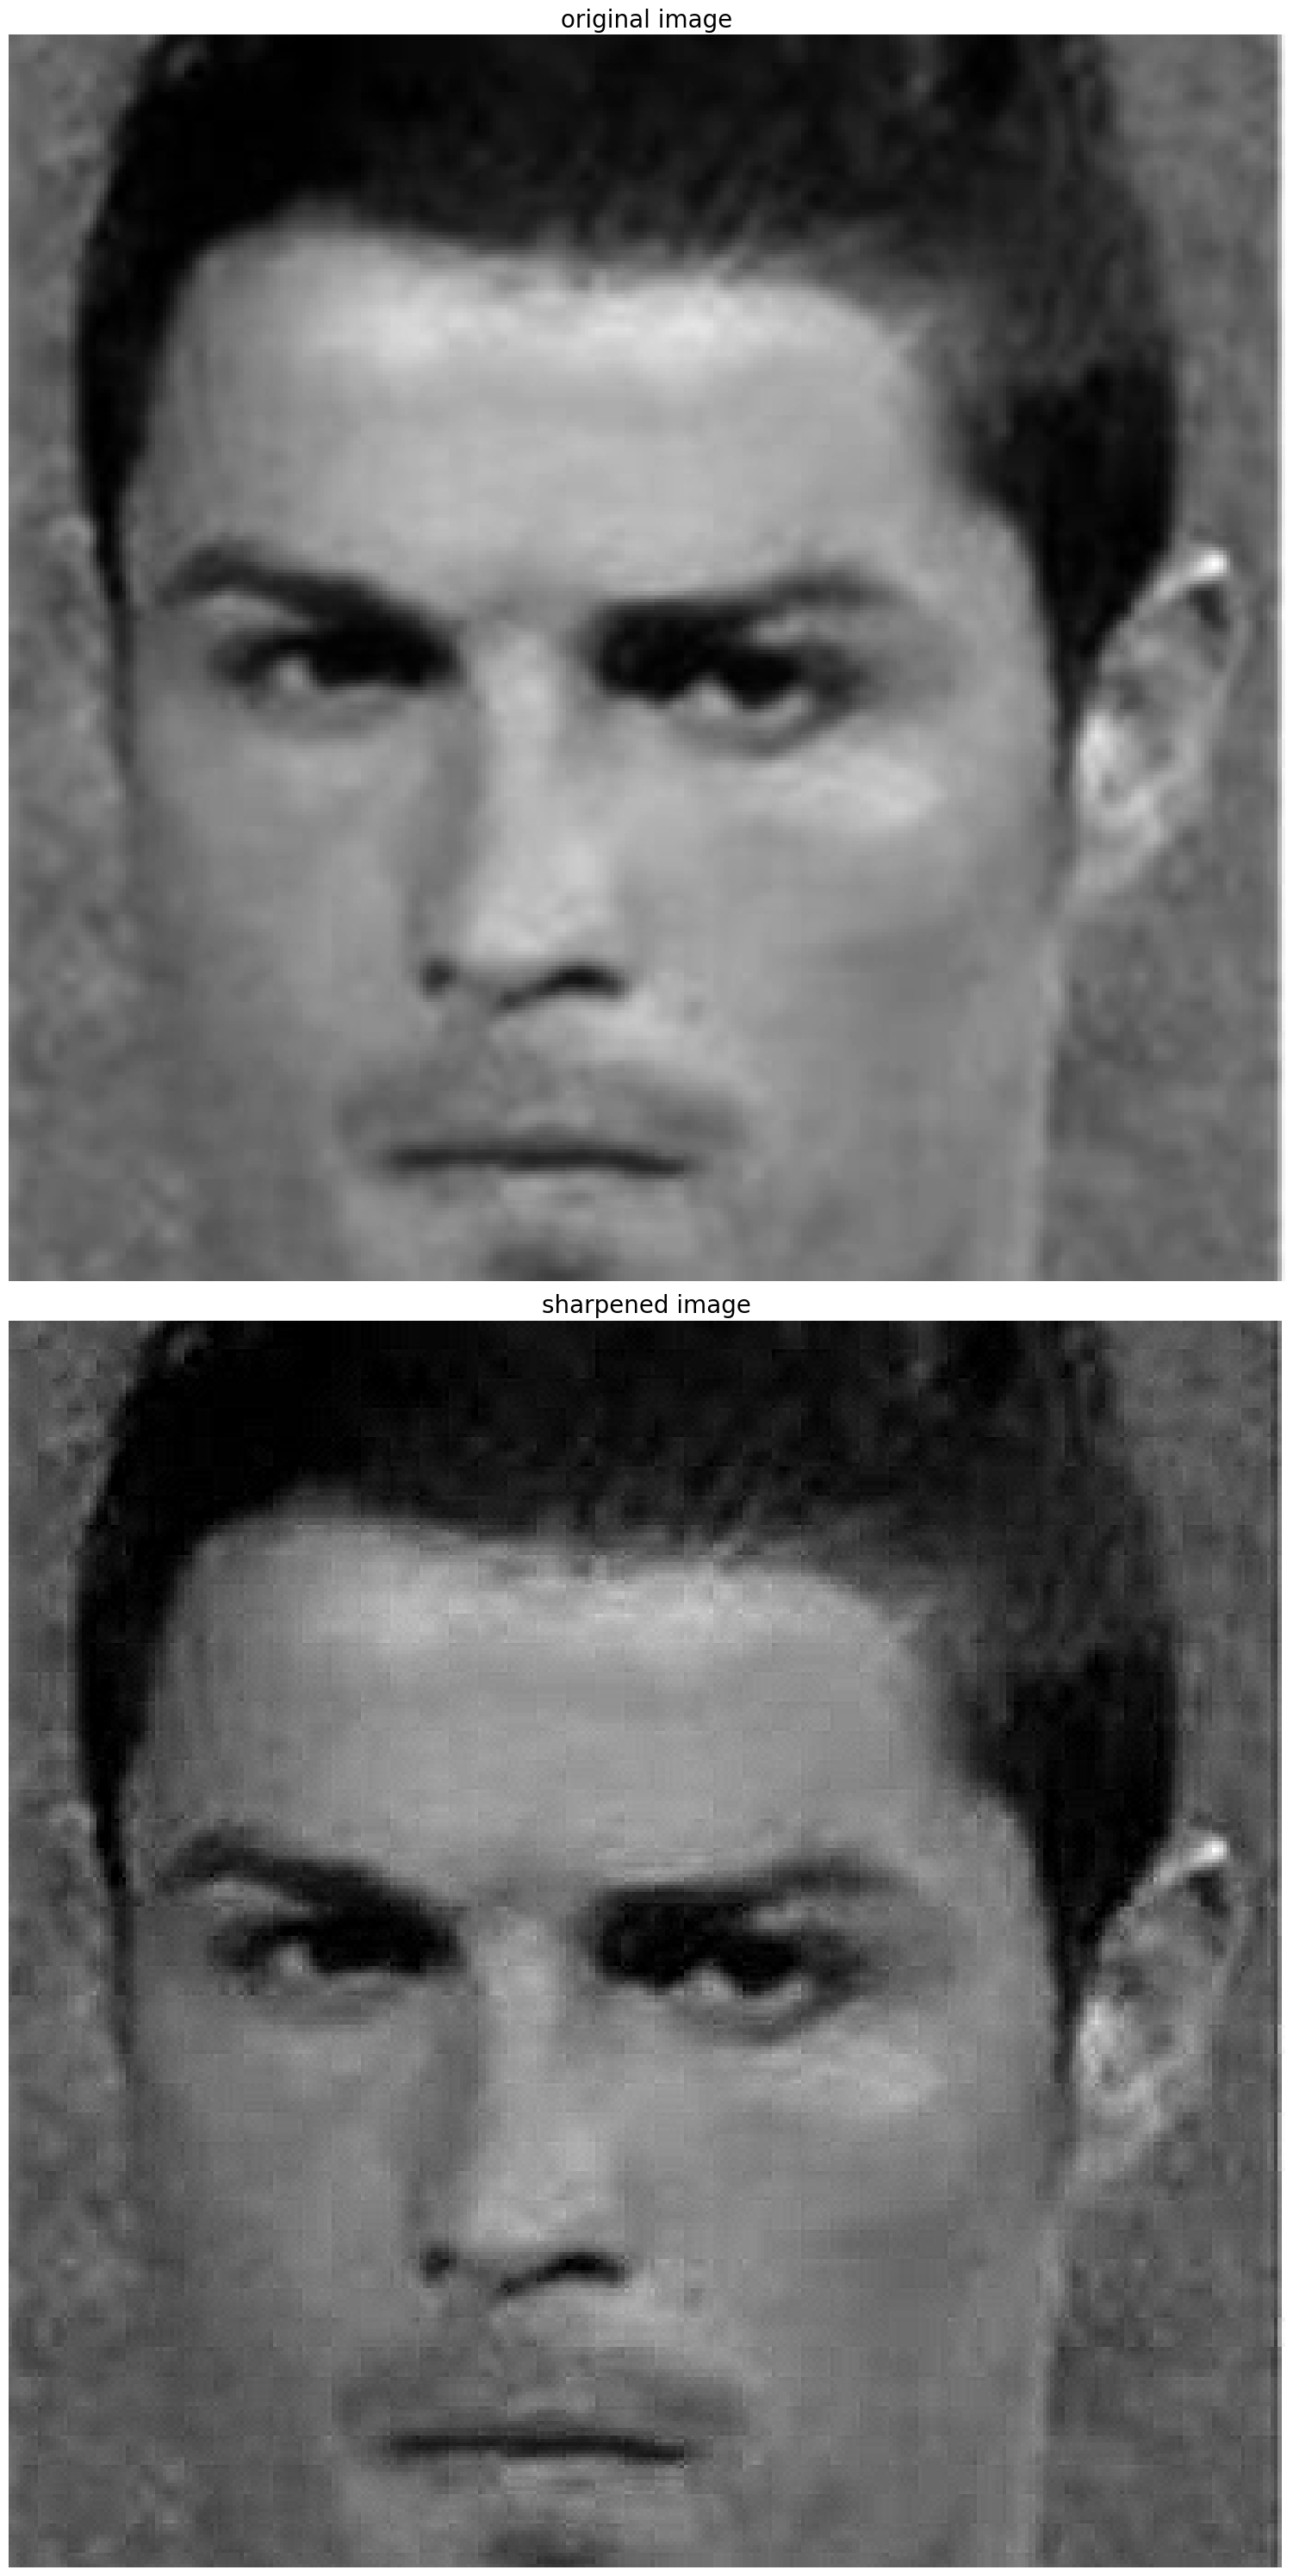

In [25]:
from skimage.filters import laplace
im = rgb2gray(imread('./images/ronaldo.jpg'))
im1 = np.clip(laplace(im) + im, 0, 1)
pylab.figure(figsize=(20,30))
pylab.subplot(211), plot_image(im, 'original image')
pylab.subplot(212), plot_image(im1, 'sharpened image')
pylab.tight_layout()
pylab.show()